In [15]:
# import os + os.chir is used to get to the llms directory to use the usermodules 
import os
os.chdir('C:/Users/AViey/OneDrive/Documents/College/UCI/Stats/stats170a/copilot/copilot/llms/user_modules') 

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from  db import Session, get_training_data, get_model_sentiment_data, add_sentiment_evaluation_data
from table_instances import SentimentEvaluation
import pandas as pd
from sklearn.metrics import accuracy_score

session = Session()

Gather Data from different models plus the training data

In [4]:
train_df = get_training_data()
train_df.head()

,dialogue_id,dataset,dialogue_text,actual_summary,actual_sentiment
0,3816,training,"#Person1#: Good morning, sir. Is there anythin...",#Person2# wants a suit made in 100 % black Bar...,neutral
1,3,training,"#Person1#: Excuse me, did you see a set of key...",#Person1#'s looking for a set of keys and asks...,positive
2,4,training,#Person1#: Why didn't you tell me you had a gi...,#Person1#'s angry because #Person2# didn't tel...,negative
3,5,training,"#Person1#: Watsup, ladies! Y'll looking'fine t...",Malik invites Nikki to dance. Nikki agrees if ...,positive
4,6,training,"#Person1#: Happy birthday, Aims!\n#Person2#: T...",Lisa gives Aims a birthday present and Aims lo...,positive


In [5]:
mistral_sentiment = get_model_sentiment_data('mistral 7b')
mistral_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,1,1,mistral 7b,neutral,None,None
1,2,2,mistral 7b,neutral,None,None
2,3,3,mistral 7b,positive,None,None
3,4,4,mistral 7b,negative,None,None
4,5,5,mistral 7b,positive,None,None


In [6]:
gemma_sentiment = get_model_sentiment_data("gemma 7b")
gemma_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,12428,3816,gemma 7b,positive,32950.429688,0.743105
1,12429,3,gemma 7b,positive,33164.658691,0.858522
2,12430,4,gemma 7b,neutral,33163.166504,0.802573
3,12431,5,gemma 7b,positive,33124.416504,0.993101
4,12432,6,gemma 7b,positive,32954.593750,1.409419


In [7]:
llama3_sentiment = get_model_sentiment_data('llama 3 8b')
llama3_sentiment.head()

,sentiment_id,dialogue_id,model_id,generated_sentiment,memory_sentiment_usage,time_sentiment_taken
0,25855,3816,llama 3 8b,positive,31030.074219,3.045265
1,25856,3,llama 3 8b,positive,31099.045410,2.877197
2,25857,4,llama 3 8b,neutral,31097.461426,2.877703
3,25858,5,llama 3 8b,positive,31085.316406,2.831945
4,25859,6,llama 3 8b,positive,31031.229492,2.781226


Compute confusion matrix for mistral

In [8]:
conf_mat_mistral = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        mistral_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_mistral.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,negative
3,5,positive,positive
4,6,positive,positive


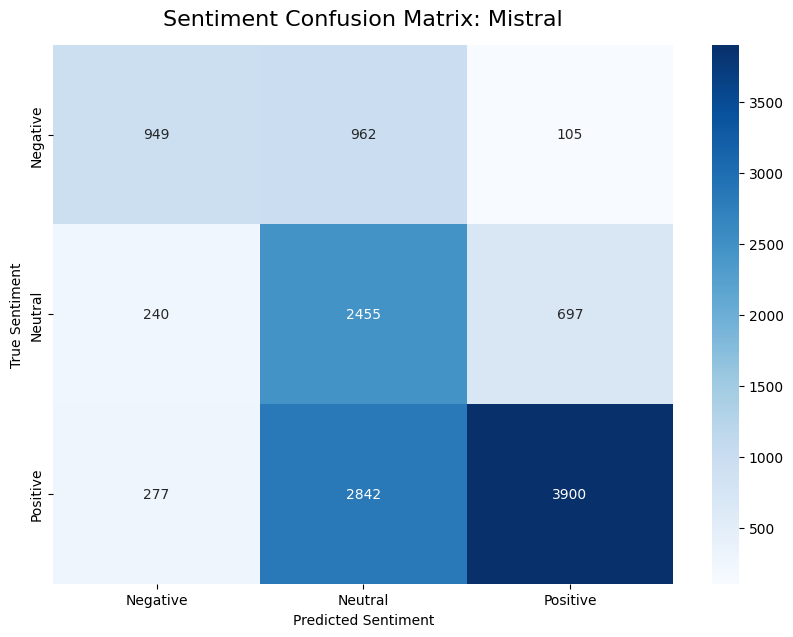

In [11]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix1 = confusion_matrix(conf_mat_mistral['actual_sentiment'], conf_mat_mistral['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Mistral', fontsize=16, pad=14)
plt.show()

Mistral accuracy score

In [20]:
accuracy_mistral = accuracy_score(conf_mat_mistral["actual_sentiment"], conf_mat_mistral["generated_sentiment"])
print(f"Overall accuracy: {accuracy_mistral:.2f}")

Overall accuracy: 0.59


Compute confusion matrix for gemma

In [12]:
conf_mat_gemma = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        gemma_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_gemma.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


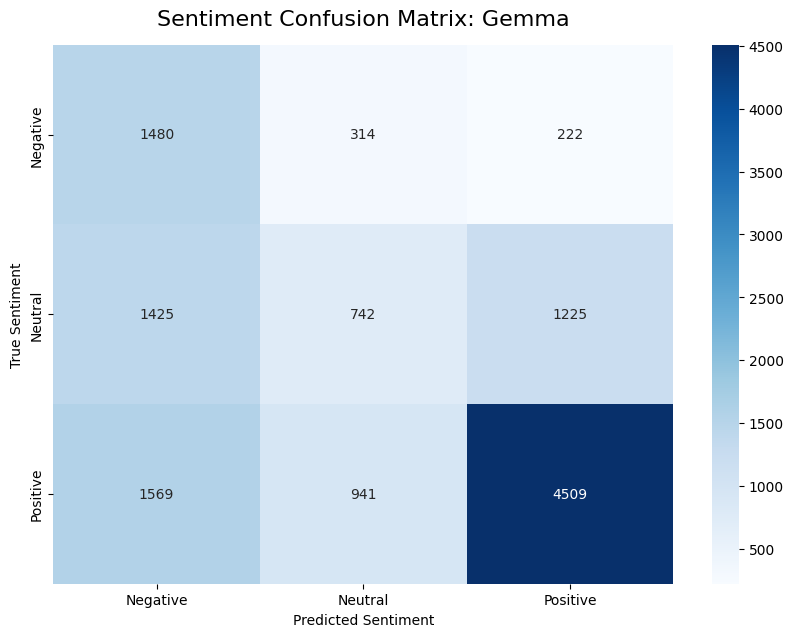

In [27]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix2 = confusion_matrix(conf_mat_gemma['actual_sentiment'], conf_mat_gemma['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Gemma', fontsize=16, pad=14)
plt.show()

In [22]:
accuracy_gemma = accuracy_score(conf_mat_gemma["actual_sentiment"], conf_mat_gemma["generated_sentiment"])
print(f"Overall accuracy: {accuracy_gemma:.2f}")

Overall accuracy: 0.54


Compute Confusion Matrix for LLama 3

In [23]:
conf_mat_llama3 = pd.merge(train_df[["dialogue_id", "actual_sentiment"]],
                        llama3_sentiment[["dialogue_id", "generated_sentiment"]],
                        on="dialogue_id",
                        how="inner")
conf_mat_llama3.head()

,dialogue_id,actual_sentiment,generated_sentiment
0,3816,neutral,positive
1,3,positive,positive
2,4,negative,neutral
3,5,positive,positive
4,6,positive,positive


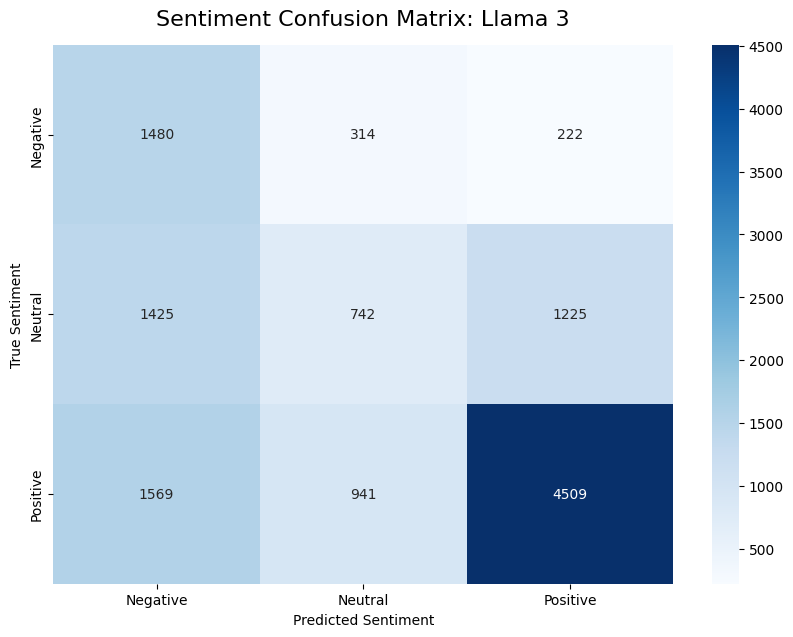

In [28]:
# Assuming binary_actual and binary_generated are your true and predicted labels converted to binary (if needed)
# For multi-class:
conf_matrix3 = confusion_matrix(conf_mat_llama3['actual_sentiment'], conf_mat_llama3['generated_sentiment'])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Sentiment Confusion Matrix: Llama 3', fontsize=16, pad=14)
plt.show()

In [26]:
accuracy_llama3 = accuracy_score(conf_mat_llama3["actual_sentiment"], conf_mat_llama3["generated_sentiment"])
print(f"Overall accuracy: {accuracy_llama3:.2f}")

Overall accuracy: 0.58


In [36]:
bar_df = pd.DataFrame({'mistral 7b': [accuracy_mistral], 'gemma 7b': [accuracy_gemma], 'llama 3 8b':[accuracy_llama3]})
bar_df = bar_df.melt(var_name='LLM Model', value_name='Accuracy Score')
bar_df = bar_df.sort_values('Accuracy Score', ascending=True)
bar_df.head()

,LLM Model,Accuracy Score
1,gemma 7b,0.541643
2,llama 3 8b,0.579062
0,mistral 7b,0.587752


C:\Users\AViey\AppData\Local\Temp\ipykernel_30312\2345357737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


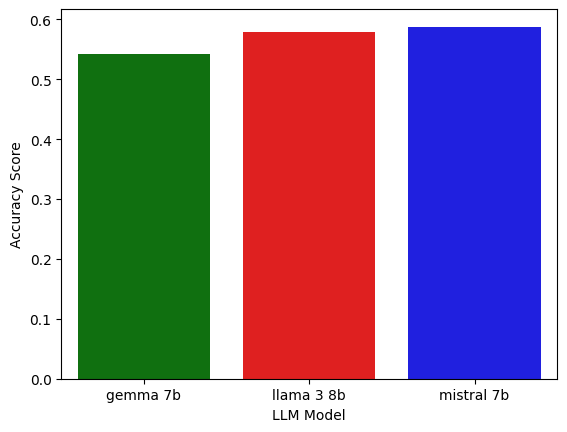

In [38]:
colors = {'mistral 7b': 'blue', 'gemma 7b': 'green', 'llama 3 8b': 'red'}
sns.barplot(
    x = "LLM Model",
    y = "Accuracy Score",
    data = bar_df,
    palette=colors
)

plt.show()